In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.filters import meijering, sato, frangi, hessian
from skimage.measure import label, regionprops
from sklearn import decomposition


In [2]:
im = Image.open('SCANS/F20_10_b/6um_jamtveit_att_pag-1.99_3-10000.tif')
imarr = np.array(im)

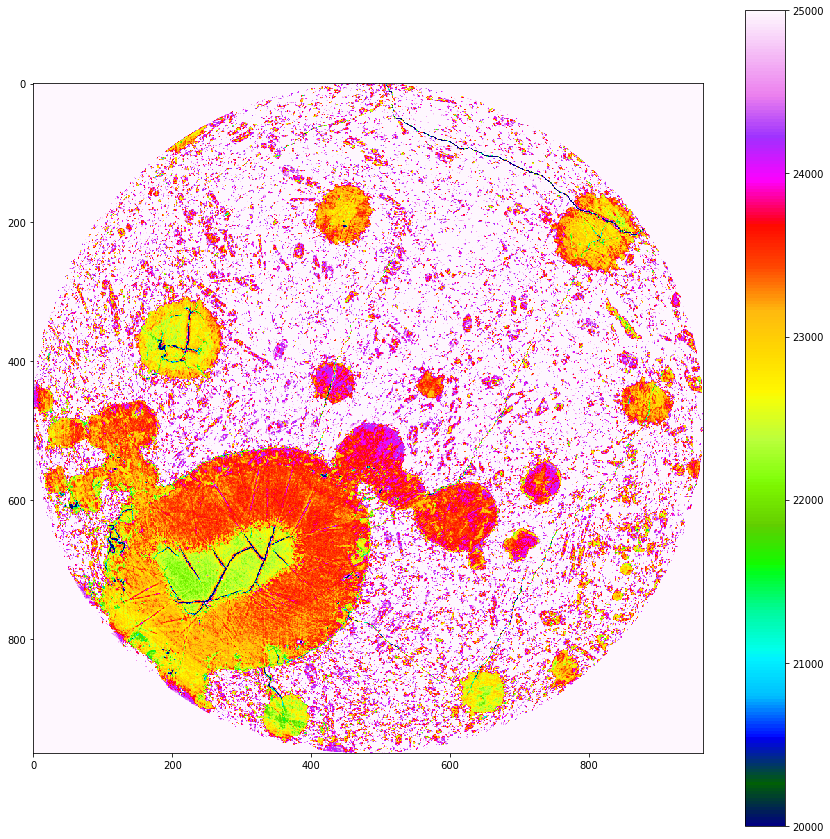

In [3]:
fig, ax = plt.subplots(figsize=(15, 15))
cbar = ax.imshow(imarr, cmap='gist_ncar', vmin=20000, vmax=25000)
fig.colorbar(cbar)

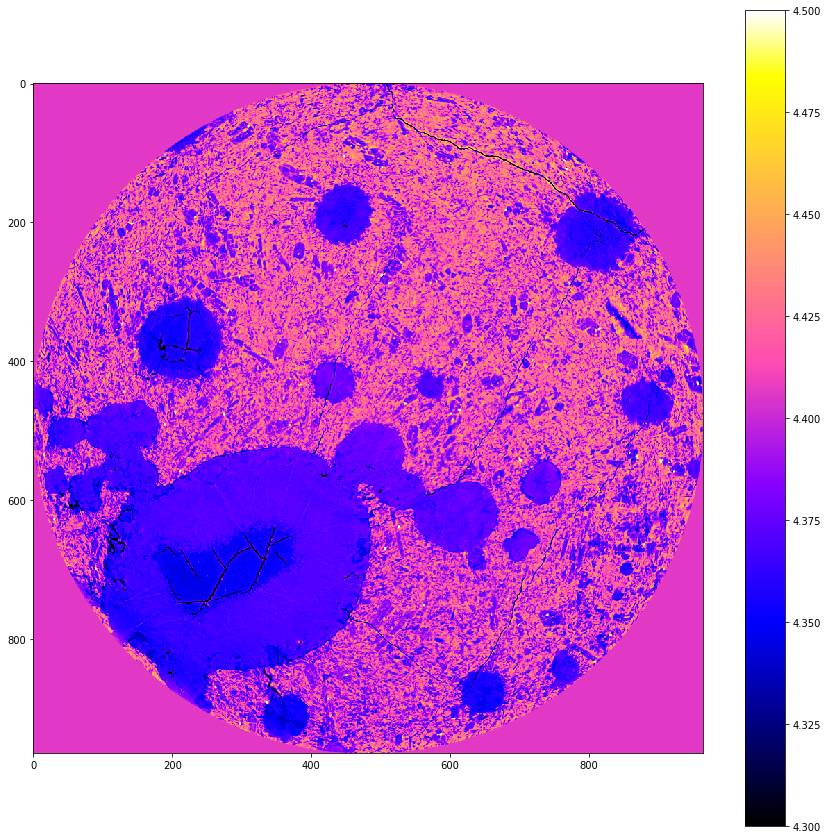

In [4]:
fig, ax = plt.subplots(figsize=(15, 15))
cbar = ax.imshow(np.log10(imarr), cmap='gnuplot2', vmin=4.3, vmax=4.5)
fig.colorbar(cbar)

In [5]:
imarr

array([[25520, 25520, 25520, ..., 25521, 25521, 25521],
       [25520, 25520, 25520, ..., 25521, 25521, 25521],
       [25520, 25520, 25520, ..., 25521, 25521, 25521],
       ...,
       [25521, 25521, 25521, ..., 25521, 25521, 25521],
       [25521, 25521, 25521, ..., 25521, 25521, 25521],
       [25521, 25521, 25521, ..., 25521, 25521, 25521]], dtype=uint16)

In [6]:
h = hessian(imarr, sigmas=[2, 2])

In [7]:
labeled = label(h)

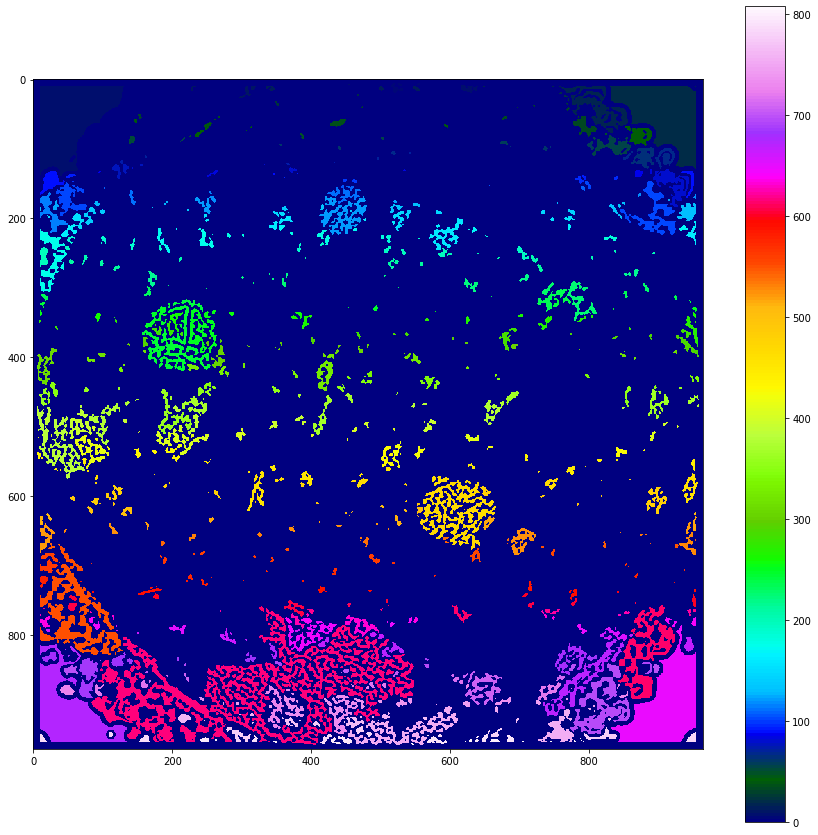

In [8]:
fig, ax = plt.subplots(figsize=(15, 15))
cbar = ax.imshow(labeled, cmap='gist_ncar')
fig.colorbar(cbar)

'\nwhat are the peaks at right above 4.4 and around 4.35?\n\nwhat are the things <4.3?\n\nremember this is only one image. What happens when you look at all the scans?\n'

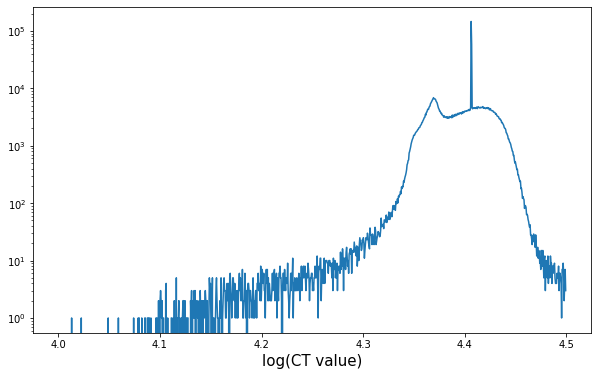

In [9]:
h, e = np.histogram(np.log10(imarr.flatten()), bins=np.linspace(4, 4.5, 1000))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(e[:-1], h)
ax.set_yscale('log')
ax.set_xlabel('log(CT value)', fontsize=15)
"""
what are the peaks at right above 4.4 and around 4.35?

what are the things <4.3?

remember this is only one image. What happens when you look at all the scans?
"""

In [10]:
df = pd.DataFrame(imarr).unstack().reset_index()
df.columns = ['x', 'y', 'ct']

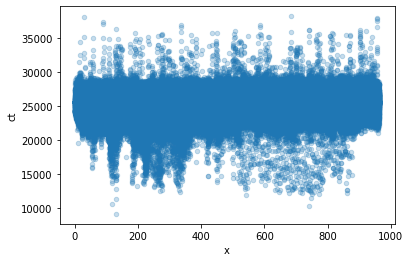

In [11]:
df.plot.scatter(x='x', y='ct', alpha=0.25)

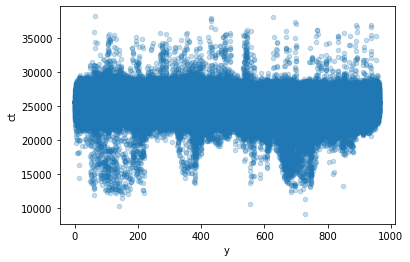

In [12]:
df.plot.scatter(x='y', y='ct', alpha=0.25)

In [13]:
pca = decomposition.PCA()

In [14]:
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.components_

array([[-0.03357441,  0.04736085, -0.99831343],
       [-0.81580389, -0.57832863,  0.        ],
       [ 0.57735324, -0.81442798, -0.05805421]])

In [16]:
pca.explained_variance_ratio_

array([0.93480944, 0.03411821, 0.03107235])

In [17]:
pcadf = pd.DataFrame(pca.fit_transform(df), columns=['x', 'y', 'ct'])

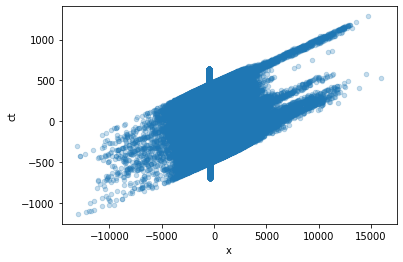

In [18]:
pcadf.plot.scatter(x='x', y='ct', alpha=0.25)

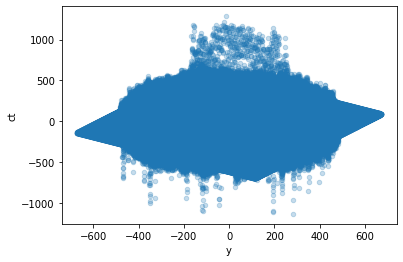

In [19]:
pcadf.plot.scatter(x='y', y='ct', alpha=0.25)

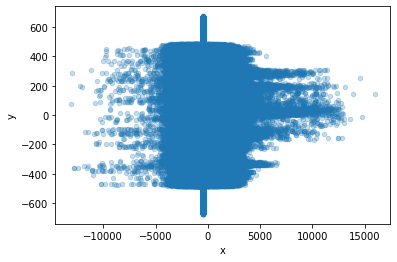

In [20]:
pcadf.plot.scatter(x='x', y='y', alpha=0.25)

In [21]:
micro6 = !ls SCANS/F20_10_b/6um_jamtveit_att_pag-1.99_3-*.tif


In [22]:
micro6_scans = []

for m in micro6:
    im = Image.open('SCANS/F20_10_b/6um_jamtveit_att_pag-1.99_3-10000.tif')
    im = np.array(im)
    micro6_scans.append(im)

'\ni am now pretty sure that the big spike is the data outside of \nthe scan.\n\nbut what is the first peak? likely \n'

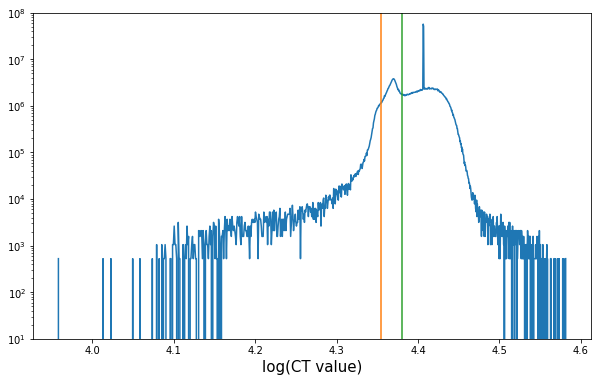

In [49]:
data = np.array(micro6_scans).flatten()

h, e = np.histogram(data, bins=1000)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.log10(e[:-1]), h)
ax.set_yscale('log')
ax.set_xlabel('log(CT value)', fontsize=15)
ax.set_ylim(1e1, 1e8)

ax.plot([4.355, 4.355], [1e1, 1e8])
ax.plot([4.38, 4.38], [1e1, 1e8])

"""
i am now pretty sure that the big spike is the data outside of 
the scan.

but what is the first peak? likely 
"""

In [54]:
from scipy.signal import find_peaks


In [101]:
peaks, other = find_peaks(h, height=1e5, width=3)

In [102]:
10**4.4 - 10**4.41

-585.0935125928227

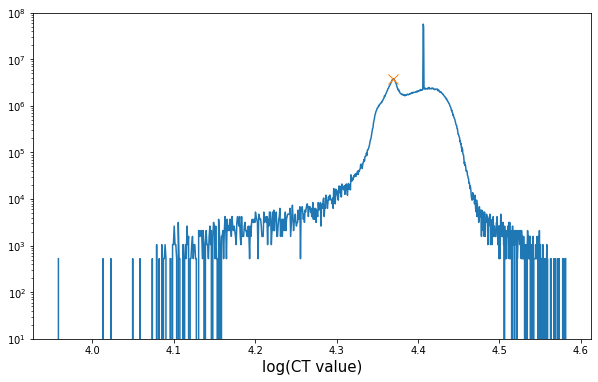

In [103]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.log10(e[:-1])

ax.plot(x, h)
ax.set_yscale('log')
ax.set_xlabel('log(CT value)', fontsize=15)
ax.set_ylim(1e1, 1e8)

ax.plot(x[peaks], h[peaks], marker='x', markersize=10, linewidth=0)

In [24]:
print(e[np.argmax(h)+1] - e[np.argmax(h)])
print(e[np.argmax(h)])



29.095000000001164
25491.579999999998


In [25]:
e[np.argmax(h)]

"""
to maintain the original values you should use groupby.count instead of 
histogram so you can identify them again in the image.
"""

'\nto maintain the original values you should use groupby.count instead of \nhistogram so you can identify them again in the image.\n'

In [26]:
imarr

"""
mask 25520 and 25521 then plot again
"""

'\nmask 25520 and 25521 then plot again\n'

In [27]:
imarr_mask = imarr.astype(np.float64)
# imarr_mask[imarr_mask==25520] = np.nan
# imarr_mask[imarr_mask==25521] = np.nan
# imarr_mask[imarr_mask>25490-30 & imarr_mask<25490+30] = np.nan
immar_mask = np.where((imarr_mask>25490-30) & (imarr_mask<25490+30), np.nan, imarr_mask)

In [28]:
import matplotlib

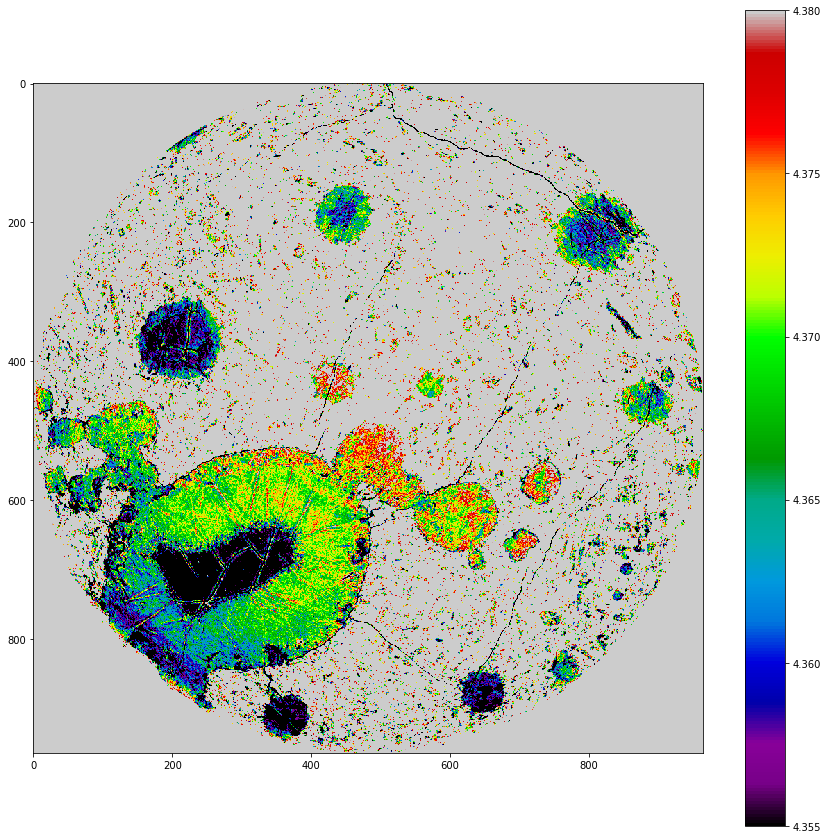

In [53]:
fig, ax = plt.subplots(figsize=(15, 15))

current_cmap = matplotlib.cm.get_cmap('nipy_spectral')

current_cmap.set_bad(color='yellow')
cbar = ax.imshow(np.log10(imarr_mask), cmap=current_cmap, vmin=4.355, vmax=4.38)

fig.colorbar(cbar)

"""
some notes:

1. the histogramming seems to separate out different pieces
2. fractures are all lower values
3. the inclusions are lower values if they include fractures and middle values if they dont
4. applying a gaussian blur will likely remove a lot of the noise
5. need to do region detection to get region properties
"""

In [34]:
np.unique(immar_mask[-50:])

array([20539., 21010., 21022., ...,    nan,    nan,    nan])

In [114]:
value, counts = np.unique(imarr, return_counts=True)

In [116]:
pd.DataFrame({'value':value, 'counts':counts}).sort_values(by='value')

,value,counts
0,9082,1
1,10306,1
2,10543,1
3,11206,1
4,11460,1
5,11869,1
6,11994,1
7,12012,1
8,12091,1
9,12175,1
